<a href="https://colab.research.google.com/github/Dhanushragav03/Rotten-Fruit-Recognition-on-a-Raspberry-Pi/blob/main/rotten_tester06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
from tensorflow.keras.utils import load_img, img_to_array
import os, numpy as np

In [52]:
%cd "/content/drive/MyDrive/rotten fruit detection dataset/fresh-rotten fruit classification upt"

/content/drive/MyDrive/rotten fruit detection dataset/fresh-rotten fruit classification upt


In [47]:
dataset_folder = "dataset/"
label_ref = {"rotten":0,"fresh":1,"unripped":2}

In [53]:
img_features = []
label = []
for folder_name in os.listdir(dataset_folder):
  #count = 0
  for image_name in os.listdir(dataset_folder+folder_name):
      #reshaping the images to 224x224x3 (same as vgg16)
      image_array = load_img(dataset_folder+folder_name+"/"+image_name,target_size=(224,224))
      image_array = img_to_array(image_array)
      img_features.append(image_array)
      label.append(label_ref[folder_name])
      #if count == 10:
      #  break
      #count += 1

In [54]:
img_features = np.array(img_features, dtype="float32")
img_features.shape

(968, 224, 224, 3)

In [55]:
label = np.array(label, dtype="int")
label.shape

(968,)

In [64]:
#train (90 %), test (10 %) datapoints
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(img_features, label, test_size=0.10, random_state=12)

In [65]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((871, 224, 224, 3), (97, 224, 224, 3), (871,), (97,))

In [63]:
import keras, pandas as pd
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

In [66]:
#loading VGG16 model weights
model_vgg = VGG16(weights='imagenet', include_top=False)

In [68]:
train_x = preprocess_input(train_x)
train_x.shape

(871, 224, 224, 3)

In [69]:
#Extracting features from the train dataset using the VGG16 pre-trained model
train_x=model_vgg.predict(train_x)
train_x.shape

28/28 [==============================] - 488s 17s/step


(871, 7, 7, 512)

In [ ]:
#reshaping the input image to 25088 (7*7*512)
train_x = train_x.reshape(train_x.shape[0],25088)

In [72]:
#performing one-hot encoding for the target variable
train_y = pd.get_dummies(train_y)
train_y = np.array(train_y)

In [ ]:
train_x.shape, train_y.shape

((871, 25088), (871, 3))

In [70]:
model = Sequential()
model.add(Dense(1000, input_dim=25088, activation='relu',kernel_initializer='uniform'))

model.add(Dense(500,input_dim=1000,activation='sigmoid'))

model.add(Dense(150,input_dim=500,activation='sigmoid'))


model.add(Dense(units=3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
#v.6

In [ ]:
#train the model
model.fit(train_x, train_y, epochs=60, batch_size=64)

Epoch 1/60
14/14 [==============================] - 10s 601ms/step - loss: 0.5827 - accuracy: 0.7784
Epoch 2/60
14/14 [==============================] - 9s 590ms/step - loss: 0.1464 - accuracy: 0.9782
Epoch 3/60
14/14 [==============================] - 9s 646ms/step - loss: 0.0560 - accuracy: 0.9943
Epoch 4/60
14/14 [==============================] - 8s 540ms/step - loss: 0.0302 - accuracy: 0.9954
Epoch 5/60
14/14 [==============================] - 10s 697ms/step - loss: 0.0201 - accuracy: 0.9977
Epoch 6/60
14/14 [==============================] - 19s 1s/step - loss: 0.0122 - accuracy: 0.9989
Epoch 7/60
14/14 [==============================] - 7s 527ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 8/60
14/14 [==============================] - 10s 704ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 9/60
14/14 [==============================] - 7s 525ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 10/60
14/14 [==============================] - 10s 701ms/step - loss: 0.0021 - accuracy: 1.00

In [ ]:
#saving model
model.save('image_classification_model/')

In [71]:
model

In [ ]:
len(test_x),len(test_y)

In [ ]:
test_x = preprocess_input(test_x)
test_x.shape

In [ ]:
#Extracting features from the train dataset using the VGG16 pre-trained model
test_x = model_vgg.predict(test_x)
test_x.shape

In [ ]:
#reshaping the input image to 25088 (7*7*512)
test_x = test_x.reshape(test_x.shape[0],25088)

In [ ]:
#performing one-hot encoding for the target variable
test_y=pd.get_dummies(test_y)
test_y=np.array(test_y)

In [ ]:
test_x.shape, test_y.shape

In [ ]:
#test accuracy
model.evaluate(test_x,test_y)

In [ ]:
#train accuracy
model.evaluate(train_x,train_y)

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import os,numpy as np

In [5]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/rotten fruit detection dataset/fresh-rotten fruit classification upt/image_classification_model')
model_vgg = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


#upload image to test

In [2]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

1/1 [==============================] - 0s 37ms/step
0.9998179
The Fruit is fresh



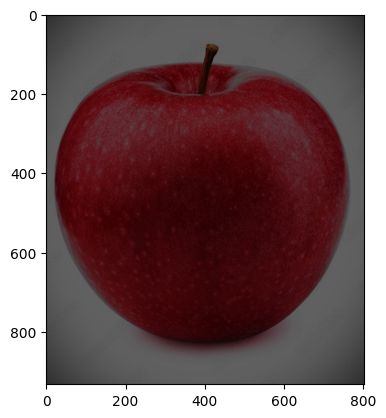

In [44]:
ip_img="/content/sample_data/fresh.jpg"
image_array = load_img(ip_img,target_size=(224,224))
image_array = img_to_array(image_array)
image_array.shape
import numpy as np
test = preprocess_input(image_array)
test.shape
test = np.expand_dims(test,axis=0)

test_predict = model_vgg.predict(test)
test_predict = test_predict.reshape(test_predict.shape[0],25088)
pred = model.predict(test_predict)
res = np.argmax(pred)
"""
if res == 0:
  print("The Fruit is rotten\n")
elif res == 1:
  print("The Fruit is fresh\n")
else:
  print("The Fruit is unripped\n")
"""
if res==2:
  print("The Fruit is unripped\n")
else:
  res=int(pred[0][1]*100)
  if res<99:
    print("The Fruit is rotten\n")
  else:
    print("The Fruit is fresh\n")
img = mpimg.imread(ip_img)
imgplot = plt.imshow(img)
plt.show()

In [7]:
print(pred)

0


In [ ]:
import RPi.GPIO as GPIO
import time
from time import sleep
import os

# Set up GPIO pins
motor_pin1 = 21
motor_pin2 = 20
GPIO.setmode(GPIO.BCM)
GPIO.setwarnings(False)
GPIO.setup(motor_pin1, GPIO.OUT)
GPIO.setup(motor_pin2, GPIO.OUT)

# Load the trained model and the VGG16 model
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import load_model

model = load_model('/home/bit/Downloads/image_classification_model')
model_vgg = VGG16(weights='imagenet', include_top=False)

# Capture video from camera
import cv2
cap = cv2.VideoCapture(0)

# Start capturing frames
start_time = time.time()
while True:
    ret, frame = cap.read()
    if ret:
        # Display the frame
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == 27:  # Press Esc to exit
            break
        # Capture a photo every 2 seconds
        current_time = time.time()
        if current_time - start_time >= 2:
            cv2.imwrite('/home/bit/last/photo.jpg', frame)
            start_time = current_time

            # Preprocess the image and make a prediction
            ip_img = "/home/bit/last/photo.jpg"
            image_array = load_img(ip_img,target_size=(224,224))
            image_array = img_to_array(image_array)
            test = preprocess_input(image_array)
            test = np.expand_dims(test,axis=0)
            test_predict = model_vgg.predict(test)
            test_predict = test_predict.reshape(test_predict.shape[0],25088)
            pred = model.predict(test_predict)
            pred = np.argmax(pred)

            # Control the motor based on the prediction
            if pred == 0:
                print("The Fruit is rotten")

                GPIO.output(motor_pin1, GPIO.HIGH)
                GPIO.output(motor_pin2, GPIO.LOW)
            elif pred == 1:
                print("The Fruit is fresh")
                GPIO.output(motor_pin1, GPIO.LOW)
            else:
                print("The Fruit not found")
                GPIO.output(motor_pin1, GPIO.LOW)

            # Delete the image file
            os.remove(ip_img)

    else:
        break

cap.release()
cv2.destroyAllWindows()



1/1 [==============================] - 0s 59ms/step
The Fruit is fresh

0.9998179


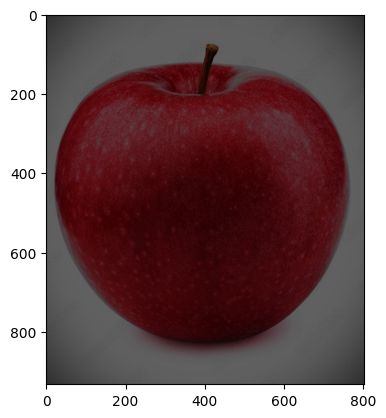

In [43]:
ip_img="/content/sample_data/fresh.jpg"
image_array = load_img(ip_img,target_size=(224,224))
image_array = img_to_array(image_array)
image_array.shape
import numpy as np
test = preprocess_input(image_array)
test.shape
test = np.expand_dims(test,axis=0)

test_predict = model_vgg.predict(test)
test_predict = test_predict.reshape(test_predict.shape[0],25088)
pred = model.predict(test_predict)

#print(pred[0][0])
res = np.argmax(pred)
if res==2:
  print("The Fruit is unripped\n")
else:
  res=int(pred[0][1]*100)
  if res<99:
    print("The Fruit is rotten\n")
  else:
    print("The Fruit is fresh\n")
print(pred[0][1])

img = mpimg.imread(ip_img)
imgplot = plt.imshow(img)
plt.show()